## Scale test using circles

Can model detect circles at different scales?



Welcome to CellposeSAM, cellpose v4.0.1! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 


Cellpose version: 4.0.1 (major number: 4)


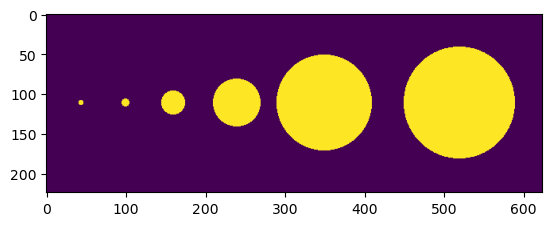

In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
import cellpose
from cellpose import models, io

image = imread('spheres.tif')

plt.imshow(image)

major_number = cellpose.version.split('.')[0]
print(f"Cellpose version: {cellpose.version} (major number: {major_number})")

no seeds found in get_masks_torch - no masks found.


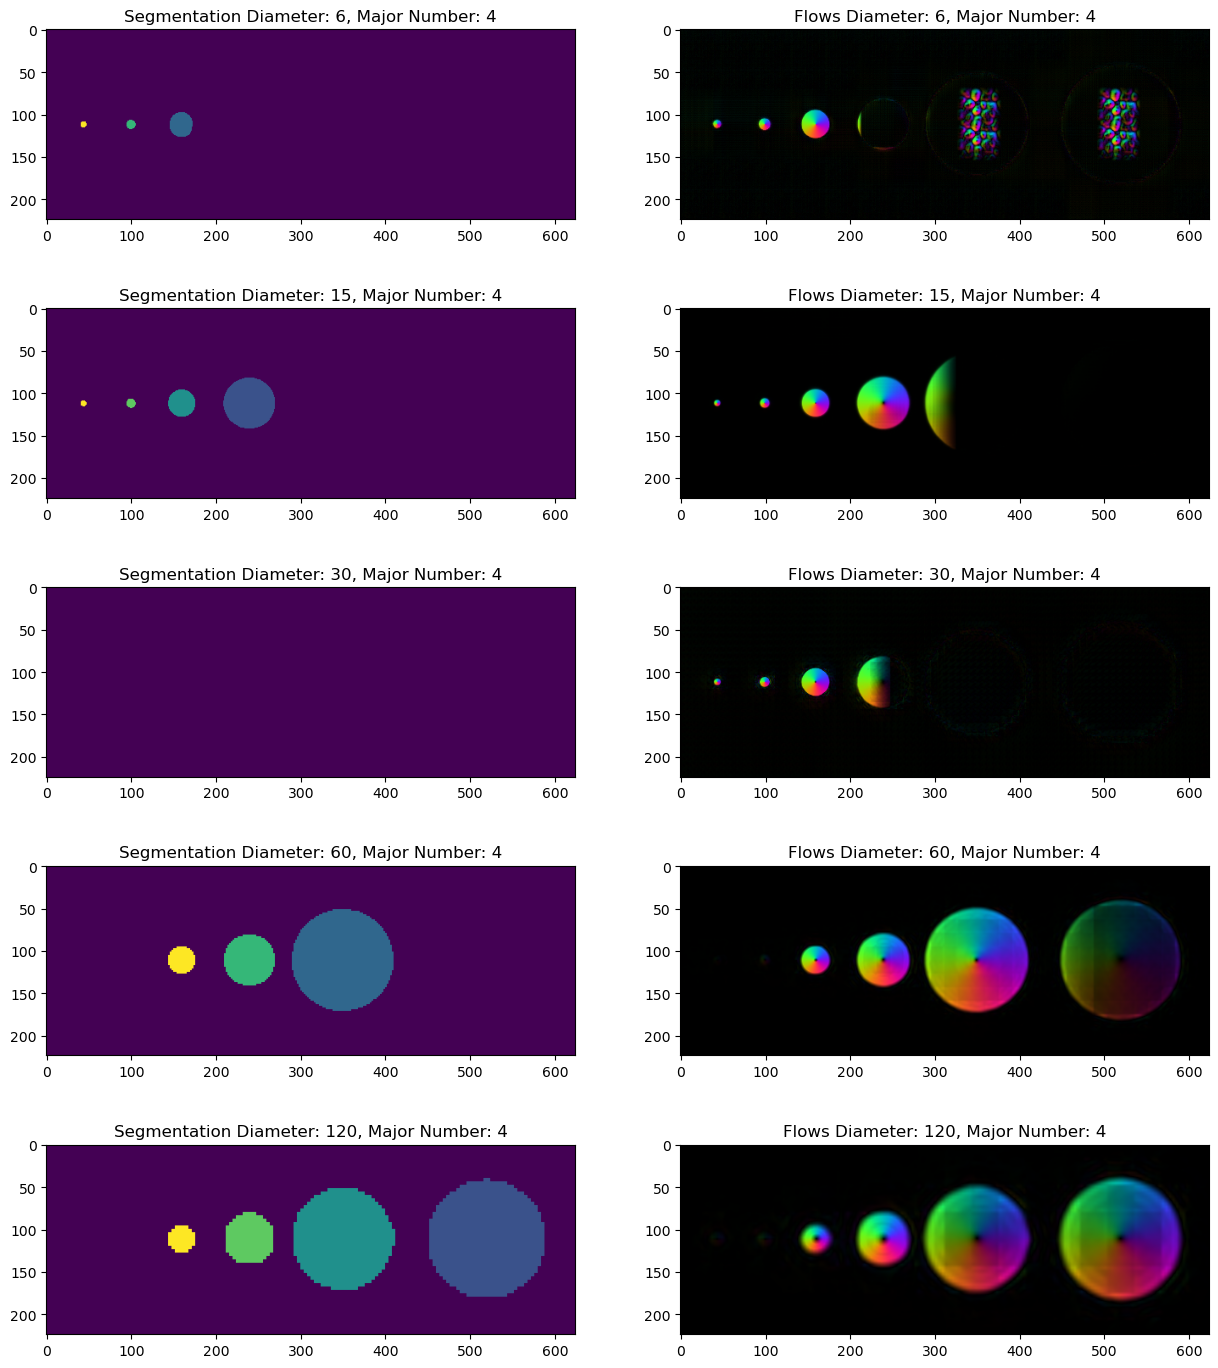

In [2]:
if major_number == '3':
    model = models.Cellpose(gpu=True, model_type='cyto3')
elif major_number == '4':
    model = models.CellposeModel(gpu=True)

diameters = [6, 15, 30, 60, 120]

fig, axes = plt.subplots(len(diameters), 2, figsize=(15, len(diameters) * 3.5))

for row, d in enumerate(diameters):
    result = model.eval(image, cellprob_threshold=-0.8, niter=2000, diameter=d)


    axes[row,0].imshow(result[0])
    axes[row,0].set_title(f"Segmentation Diameter: {d}, Major Number: {major_number}")
    axes[row,1].imshow(result[1][0])
    axes[row,1].set_title(f"Flows Diameter: {d}, Major Number: {major_number}")

fig.savefig(f'cellpose_diameter_{cellpose.version}.png', dpi=300, bbox_inches='tight')